In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df['workclass'].value_counts(normalize=True)

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64

In [5]:
df['income'].value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [6]:
df['income'] = np.where(df['income']=='>50K','high','low')
# df = df.drop(columns='fnlwgt)
df = df.drop('fnlwgt', axis=1)

In [7]:
df_temp = df[['sex']]
df_temp.value_counts(normalize=True)

sex   
Male      0.668482
Female    0.331518
dtype: float64

In [8]:
df_temp = pd.get_dummies(df_temp)

In [9]:
df_temp

,sex_Female,sex_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
48837,1,0
48838,0,1
48839,1,0
48840,0,1


In [10]:
target = df['income']
target
df = df.drop(columns='income')

In [11]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [12]:
df = pd.get_dummies(df)
df['income'] = target
df

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
0,25,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,low
1,38,9,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,low
2,28,12,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,high
3,44,10,7688,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,high
4,18,10,0,0,30,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,low
48838,40,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,high
48839,58,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,low
48840,22,9,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,low


## 결정 트리(DecisionTree) 사용

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [14]:
X_train, X_test = train_test_split(df, test_size=0.2,
                                   stratify=df['income'],
                                   random_state=20)

model = tree.DecisionTreeClassifier(random_state=20, max_depth=3)

y_train = X_train['income']
X_train = X_train.drop(columns='income')

### samples = 데이터 분석에 사용되는 표본데이터

[Text(0.5, 0.875, 'x[32] <= 0.5\ngini = 0.364\nsamples = 39073\nvalue = [9349, 29724]'),
 Text(0.25, 0.625, 'x[2] <= 7073.5\ngini = 0.121\nsamples = 21106\nvalue = [1366, 19740]'),
 Text(0.125, 0.375, 'x[1] <= 13.5\ngini = 0.093\nsamples = 20738\nvalue = [1012, 19726]'),
 Text(0.0625, 0.125, 'gini = 0.071\nsamples = 19643\nvalue = [727, 18916]'),
 Text(0.1875, 0.125, 'gini = 0.385\nsamples = 1095\nvalue = [285, 810]'),
 Text(0.375, 0.375, 'x[2] <= 8296.0\ngini = 0.073\nsamples = 368\nvalue = [354, 14]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.4375, 0.125, 'gini = 0.028\nsamples = 349\nvalue = [344, 5]'),
 Text(0.75, 0.625, 'x[1] <= 12.5\ngini = 0.494\nsamples = 17967\nvalue = [7983, 9984]'),
 Text(0.625, 0.375, 'x[2] <= 5095.5\ngini = 0.442\nsamples = 12610\nvalue = [4155, 8455]'),
 Text(0.5625, 0.125, 'gini = 0.418\nsamples = 12007\nvalue = [3565, 8442]'),
 Text(0.6875, 0.125, 'gini = 0.042\nsamples = 603\nvalue = [590, 13]'),
 Text(0.875, 0.375, 

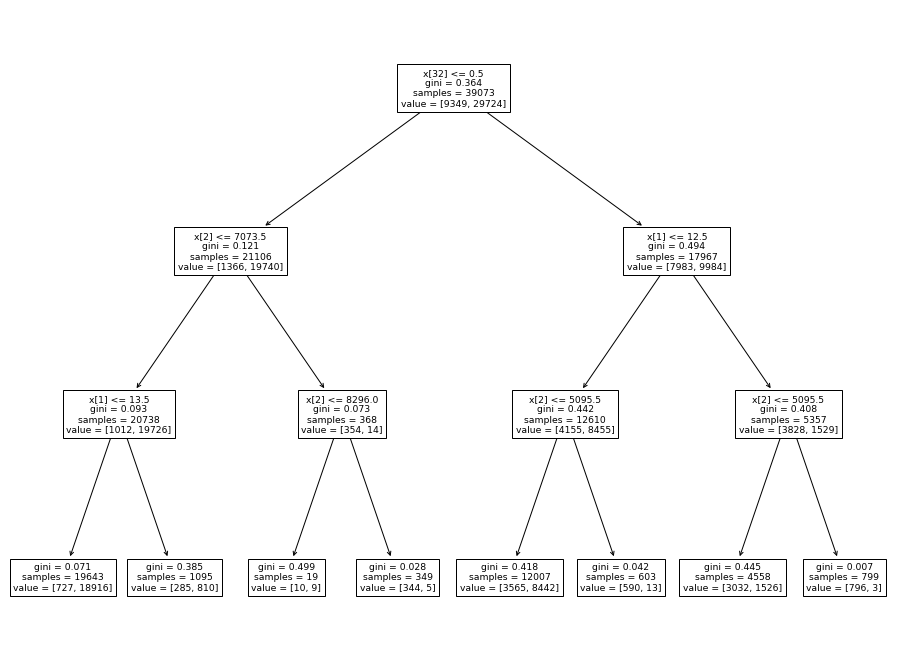

In [15]:
model.fit(X=X_train, y=y_train)
plt.figure(figsize=(16,12))
tree.plot_tree(model)

[Text(0.5, 0.875, 'marital_status_Married-civ-spouse <= 0.5\ngini = 0.364\nsamples = 100.0%\nvalue = [0.239, 0.761]\nclass = low'),
 Text(0.25, 0.625, 'capital_gain <= 7073.5\n0.121\n54.0%\n[0.065, 0.935]\nlow'),
 Text(0.125, 0.375, 'education_num <= 13.5\n0.093\n53.1%\n[0.049, 0.951]\nlow'),
 Text(0.0625, 0.125, '0.071\n50.3%\n[0.037, 0.963]\nlow'),
 Text(0.1875, 0.125, '0.385\n2.8%\n[0.26, 0.74]\nlow'),
 Text(0.375, 0.375, 'capital_gain <= 8296.0\n0.073\n0.9%\n[0.962, 0.038]\nhigh'),
 Text(0.3125, 0.125, '0.499\n0.0%\n[0.526, 0.474]\nhigh'),
 Text(0.4375, 0.125, '0.028\n0.9%\n[0.986, 0.014]\nhigh'),
 Text(0.75, 0.625, 'education_num <= 12.5\n0.494\n46.0%\n[0.444, 0.556]\nlow'),
 Text(0.625, 0.375, 'capital_gain <= 5095.5\n0.442\n32.3%\n[0.33, 0.67]\nlow'),
 Text(0.5625, 0.125, '0.418\n30.7%\n[0.297, 0.703]\nlow'),
 Text(0.6875, 0.125, '0.042\n1.5%\n[0.978, 0.022]\nhigh'),
 Text(0.875, 0.375, 'capital_gain <= 5095.5\n0.408\n13.7%\n[0.715, 0.285]\nhigh'),
 Text(0.8125, 0.125, '0.445\n1

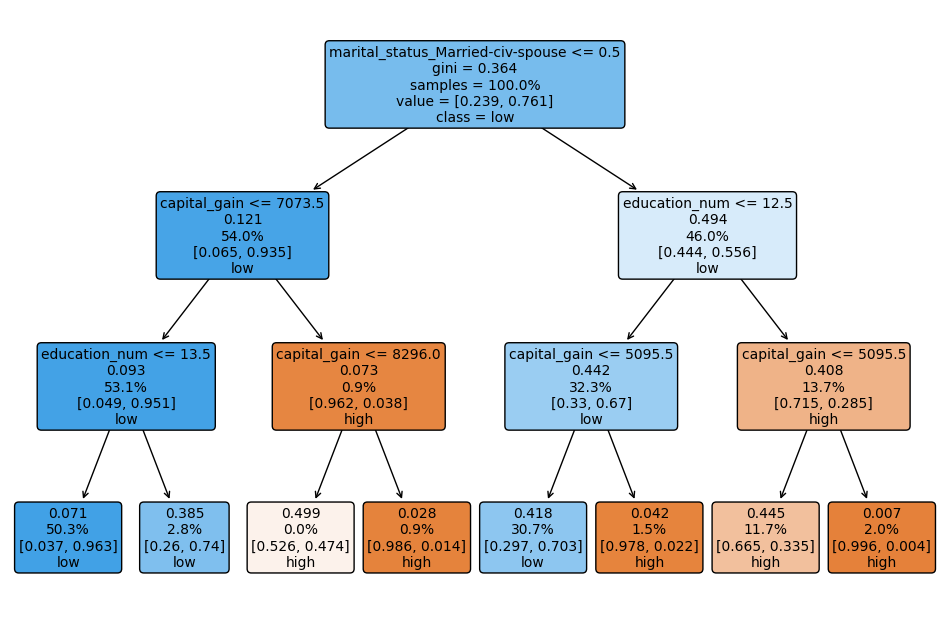

In [16]:
plt.rcParams.update({'figure.dpi':'100','figure.figsize':[12,8]})
#plt.figure(figsize=(16,12))

tree.plot_tree(model,
               feature_names =X_train.columns,      # 예측 변수명
               class_names=['high','low'],          # target
               proportion=True,                     # 비율
               filled=True,                         # 색칠
               rounded=True,                        # 둥근 테두리
               impurity=True,                       # 불순도
               label='root',                        # label 표시위치
               fontsize=10)                         # 폰트 크기

In [17]:
y_test = X_test['income']
X_test = X_test.drop(columns='income')
X_test['pred'] = model.predict(X_test)

In [18]:
len(X_test)

9769

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, f1_score, ConfusionMatrixDisplay


In [22]:
conf_mat = confusion_matrix(y_true=y_test,
                            y_pred=X_test['pred'],
                            labels=['high','low'])
conf_mat

array([[1210, 1128],
       [ 353, 7078]])

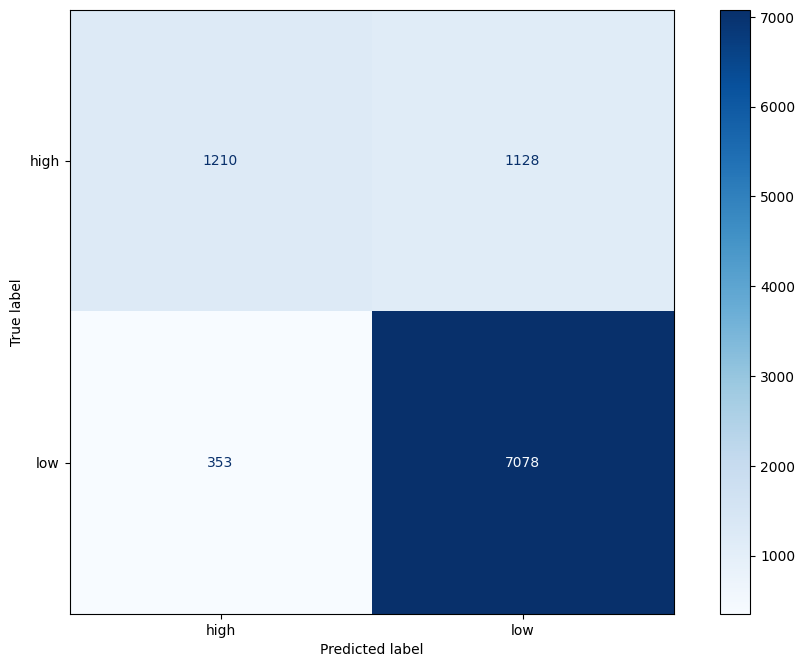

In [37]:
p = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=('high','low'))
p.plot(cmap='Blues')

In [30]:
print(accuracy_score(y_true = y_test,
               y_pred= X_test['pred']))
print(recall_score(y_true = y_test,
               y_pred= X_test['pred'],
               pos_label='high'))
print(precision_score(y_true = y_test,
               y_pred= X_test['pred'],
               pos_label='high'))
print(f1_score(y_true = y_test,
               y_pred= X_test['pred'],
               pos_label='high'))

0.8483979936533934
0.5175363558597091
0.7741522712731925
0.6203537554473212
